In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

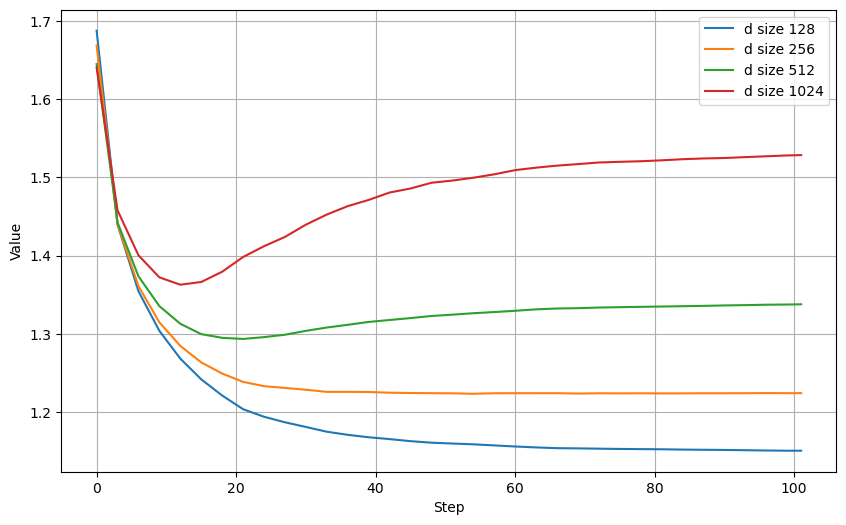

In [18]:
folder_path = "model_save/eksperyment_2"
# format nazwy plików z logami treningu z tensorboard: eksperyment_2_setup2_training.csv
dropout_mapping = {
    1: 'd size 128',
    2: 'd size 256',
    3: 'd size 512',
    4: 'd size 1024'
}
data = {}
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, delimiter=",") 
        parts = file_name.split("_")
        experiment_num = int(parts[2][5])
        phase = parts[3].split(".")[0]  
        dropout = dropout_mapping[experiment_num]
        if dropout not in data:
            data[dropout] = {}
        data[dropout][phase] = df
plt.figure(figsize=(10, 6))

for dropout, phases in data.items():
    if "test" in phases:
        training_data = phases["test"]
        plt.plot(training_data["Step"], training_data["Value"], label=f"{dropout}")

plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
